In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  

import scipy.stats as stats  
import statsmodels.api as sm  

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 50)  

sns.set(style="whitegrid")  

%matplotlib inline

In [2]:
df = pd.read_excel(r'D:\Work\Data Analysis TFA\01 free Agent players in 2025 summer\Main Files\FreeAgentsStats.xlsx')
print(df)

                    Player    Pos  Age  MarketValue            Squad  MP   
0            Mohamed Salah     FW   32           55        Liverpool  30  \
1          Virgil van Dijk     DF   33           28        Liverpool  30   
2   Trent Alexander-Arnold     DF   26           75        Liverpool  28   
3           Jonathan David     FW   25           45            Lille  25   
4             Jonathan Tah     DF   29           30       Leverkusen  26   
5          Kevin De Bruyne     MF   33           27  Manchester City  20   
6               Leroy Sané     FW   29           38    Bayern Munich  23   
7           Frank Anguissa     MF   29           27           Napoli  28   
8          Tyrick Mitchell     DF   25           25   Crystal Palace  29   
9              Angel Gomes     MF   24           20            Lille  14   
10   Dominic Calvert-Lewin     FW   28           20          Everton  22   
11                Ola Aina     DF   28           20  Nott'ham Forest  30   
12      Kyle

Image saved to players_market_value_table_styled.png


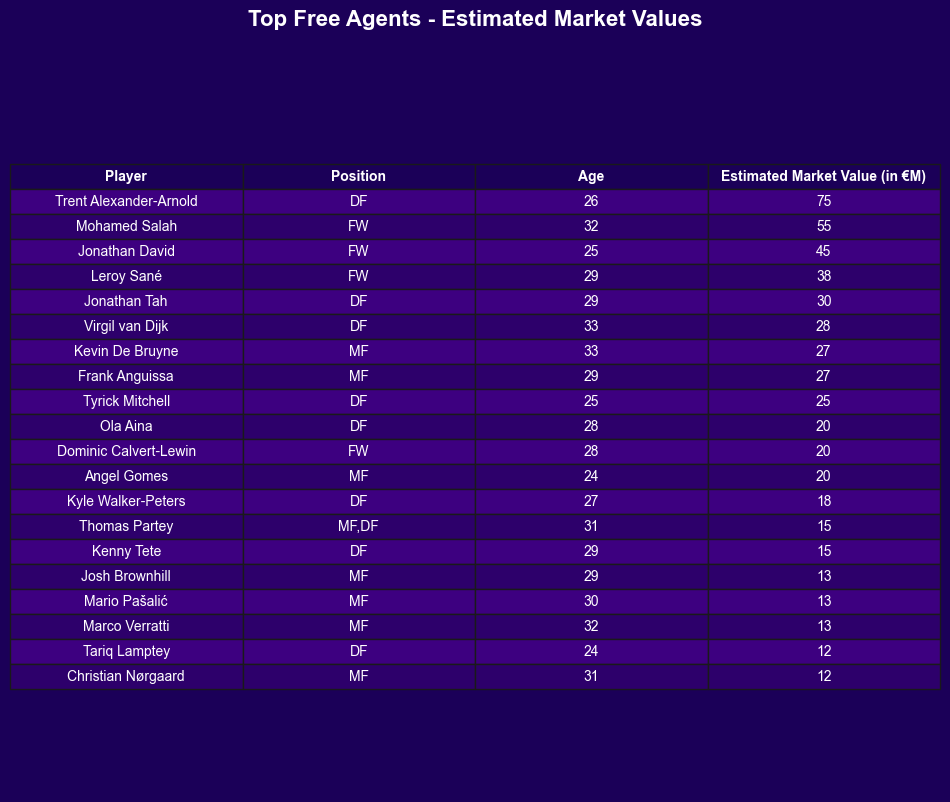

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

value_table = df[['Player', 'Pos', 'Age', 'MarketValue']].copy()
value_table = value_table.rename(columns={
    'Pos': 'Position',
    'MarketValue': 'Estimated Market Value (in €M)'
})
value_table_sorted = value_table.sort_values(by='Estimated Market Value (in €M)', ascending=False)

header_color = "#1B0058" 
row_colors = ["#2D006B", "#3D0080"]  
text_color = "white"

fig, ax = plt.subplots(figsize=(12, len(value_table_sorted) * 0.4 + 1.5))
ax.axis('off')

plt.title('Top Free Agents - Estimated Market Values', fontsize=16, fontweight='bold', pad=25, color=text_color)

table = ax.table(
    cellText=value_table_sorted.values,
    colLabels=value_table_sorted.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_facecolor(header_color)
        cell.set_text_props(weight='bold', color=text_color)
    else:
        cell.set_facecolor(row_colors[row % 2])
        cell.set_text_props(color=text_color)

fig.patch.set_facecolor(header_color)

output_path = 'players_market_value_table_styled.png'
plt.savefig(output_path, bbox_inches='tight', dpi=300, transparent=True)

print(f"Image saved to {output_path}")


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       20 non-null     object 
 1   Pos          20 non-null     object 
 2   Age          20 non-null     int64  
 3   MarketValue  20 non-null     int64  
 4   Squad        20 non-null     object 
 5   MP           20 non-null     int64  
 6   Min          20 non-null     int64  
 7   Gls          20 non-null     int64  
 8   Ast          20 non-null     int64  
 9   G+A          20 non-null     int64  
 10  xG           20 non-null     float64
 11  npxG         20 non-null     float64
 12  xAG          20 non-null     float64
 13  PrgC         20 non-null     int64  
 14  PrgP         20 non-null     int64  
 15  Shots        20 non-null     int64  
 16  SoT          20 non-null     int64  
 17  PassesCmp    20 non-null     int64  
 18  PassesAtt    20 non-null     int64  
 19  PPA       

In [30]:
print (df.head())

                   Player Pos  Age  MarketValue       Squad  MP   Min  Gls   
0           Mohamed Salah  FW   32           55   Liverpool  30  2657   27  \
1         Virgil van Dijk  DF   33           28   Liverpool  30  2700    1   
2  Trent Alexander-Arnold  DF   26           75   Liverpool  28  2145    2   
3          Jonathan David  FW   25           45       Lille  25  1990   14   
4            Jonathan Tah  DF   29           30  Leverkusen  26  2340    2   

   Ast  G+A    xG  npxG   xAG  PrgC  PrgP  Shots  SoT  PassesCmp  PassesAtt   
0   17   44  22.1  15.0  11.2   124   114     98   45        717       1003  \
1    1    2   1.6   1.6   0.5    16   145     19    6       2158       2353   
2    6    8   1.6   1.6   6.7    48   204     38    7       1321       1787   
3    3   17  14.1   8.6   3.5    26    47     50   22        433        533   
4    0    2   0.9   0.9   0.3    13   135     19    5       1763       1884   

   PPA  CrsPA  Tkl  Blocks  Int  Clr  Crs  BallRecov  De

Analyze Forwards (Pos = FW) - Performance vs Age & Market Value

C:\Users\muspo\AppData\Local\Temp\ipykernel_1796\32125275.py:15: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(


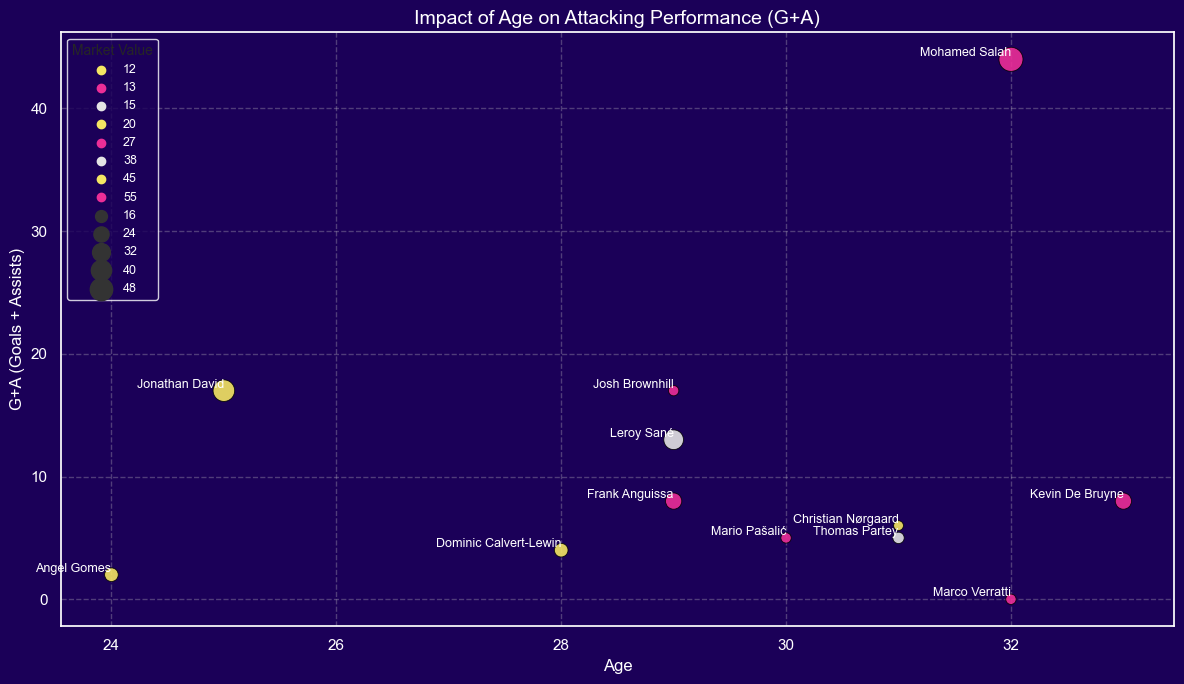

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_attackers = df[df["Pos"].str.contains("FW|MF", na=False)]

custom_palette = ["#f5e663", "#ec2e97", "#e4e4e4", "#f5e663", "#ec2e97", "#e4e4e4"]

bg_color = "#1B0058"
text_color = "white"

plt.figure(figsize=(12, 7))
ax = sns.scatterplot(
    data=df_attackers,
    x="Age",
    y="G+A",
    size="MarketValue",
    hue="MarketValue",
    sizes=(50, 300),
    palette=custom_palette,
    edgecolor="black",
    alpha=0.9
)

for i, row in df_attackers.iterrows():
    plt.annotate(row["Player"], (row["Age"], row["G+A"]), fontsize=9, ha='right', va='bottom', color=text_color)

plt.title("Impact of Age on Attacking Performance (G+A)", fontsize=14, color=text_color)
plt.xlabel("Age", color=text_color)
plt.ylabel("G+A (Goals + Assists)", color=text_color)

ax.set_facecolor(bg_color)
plt.gca().spines['top'].set_color(text_color)
plt.gca().spines['right'].set_color(text_color)
plt.gca().spines['left'].set_color(text_color)
plt.gca().spines['bottom'].set_color(text_color)
plt.tick_params(colors=text_color)
plt.grid(True, linestyle="--", alpha=0.3)

plt.gcf().patch.set_facecolor(bg_color)
plt.legend(title="Market Value", loc='upper left', facecolor=bg_color, edgecolor="white", labelcolor=text_color, title_fontsize='10', fontsize='9')
plt.tight_layout()
plt.show()


Visualizing the Performance of Attacking Players: Goals vs Expected Goals (xG)

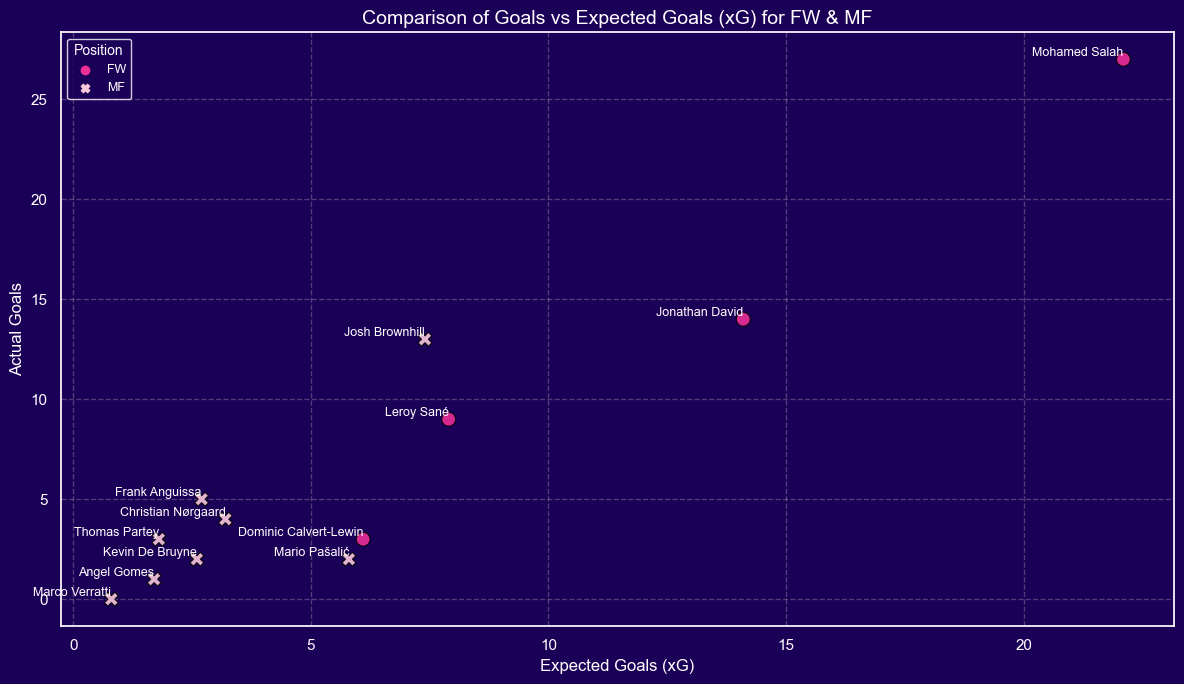

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df_attackers = df[df["Pos"].str.contains("FW|MF", na=False)]

bg_color = "#1B0058"  
text_color = "white" 

color_palette = {"FW": "#ec2e97", "MF": "#f8c8dc"}

plt.figure(figsize=(12, 7))
ax = sns.scatterplot(
    data=df_attackers,
    x="xG",
    y="Gls",
    hue=df_attackers["Pos"].apply(lambda x: "FW" if "FW" in x else "MF"),  
    style=df_attackers["Pos"].apply(lambda x: "FW" if "FW" in x else "MF"), 
    palette=color_palette,
    s=100,
    edgecolor="black",
    alpha=0.9
)

for i, row in df_attackers.iterrows():
    plt.annotate(row["Player"], (row["xG"], row["Gls"]), fontsize=9, ha='right', va='bottom', color=text_color)

plt.title("Comparison of Goals vs Expected Goals (xG) for FW & MF", fontsize=14, color=text_color)
plt.xlabel("Expected Goals (xG)", color=text_color)
plt.ylabel("Actual Goals", color=text_color)

ax.set_facecolor(bg_color)
plt.gcf().patch.set_facecolor(bg_color)
plt.gca().spines['top'].set_color(text_color)
plt.gca().spines['right'].set_color(text_color)
plt.gca().spines['left'].set_color(text_color)
plt.gca().spines['bottom'].set_color(text_color)
plt.tick_params(colors=text_color)
plt.grid(True, linestyle="--", alpha=0.3)

legend = plt.legend(title="Position", facecolor=bg_color, edgecolor="white", labelcolor=text_color, title_fontsize='10', fontsize='9')
plt.setp(legend.get_texts(), color=text_color)
plt.setp(legend.get_title(), color=text_color)

plt.tight_layout()
plt.show()


Analysis of Midfielders (MF) Based on Age and Market Value

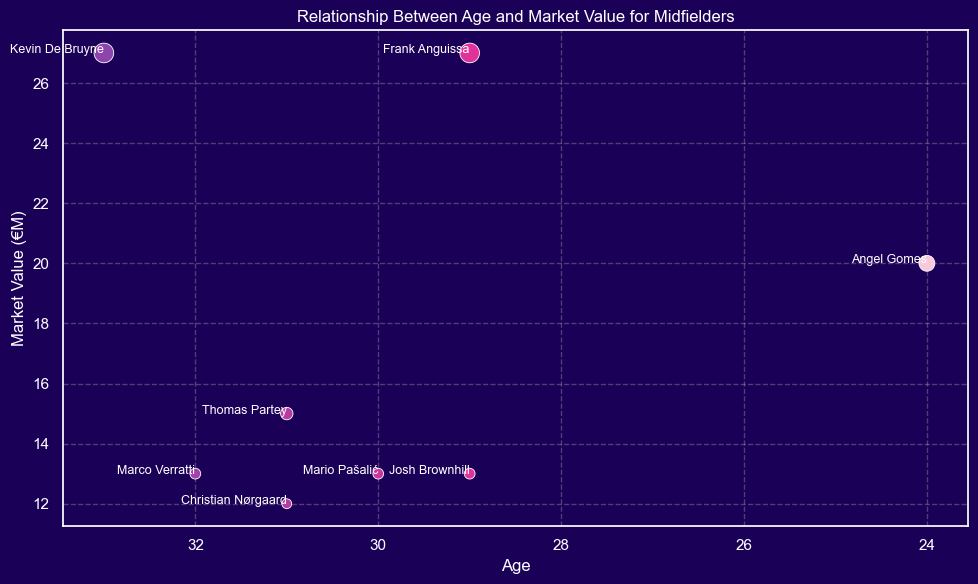

                Player  Age  MarketValue
5      Kevin De Bruyne   33           27
7       Frank Anguissa   29           27
9          Angel Gomes   24           20
13       Thomas Partey   31           15
15      Josh Brownhill   29           13
16       Mario Pašalić   30           13
17      Marco Verratti   32           13
19  Christian Nørgaard   31           12


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

df_midfielders = df[df["Pos"].str.contains("MF", na=False)]

bg_color = "#1B0058"
text_color = "white"

custom_cmap = LinearSegmentedColormap.from_list("custom_pinkpurple", ["#f8c8dc", "#ec2e97", "#8e44ad"])

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    data=df_midfielders,
    x="Age",
    y="MarketValue",
    hue="Age",
    palette=custom_cmap,
    size="MarketValue",
    sizes=(50, 200),
    legend=None
)

for i in range(df_midfielders.shape[0]):
    plt.text(df_midfielders.iloc[i]["Age"], df_midfielders.iloc[i]["MarketValue"],
             df_midfielders.iloc[i]["Player"], fontsize=9, ha='right', color=text_color)

plt.title("Relationship Between Age and Market Value for Midfielders", color=text_color)
plt.xlabel("Age", color=text_color)
plt.ylabel("Market Value (€M)", color=text_color)

ax.set_facecolor(bg_color)
plt.gcf().patch.set_facecolor(bg_color)
plt.gca().spines['top'].set_color(text_color)
plt.gca().spines['right'].set_color(text_color)
plt.gca().spines['left'].set_color(text_color)
plt.gca().spines['bottom'].set_color(text_color)
plt.tick_params(colors=text_color)
plt.grid(True, linestyle="--", alpha=0.3)

plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

age_marketvalue_stats = df_midfielders[["Player", "Age", "MarketValue"]].sort_values(by="MarketValue", ascending=False)
print(age_marketvalue_stats)


Midfielders' Passing Performance: Passes Completed, Passes Attempted, and Progressive Passes

<Figure size 1200x800 with 0 Axes>

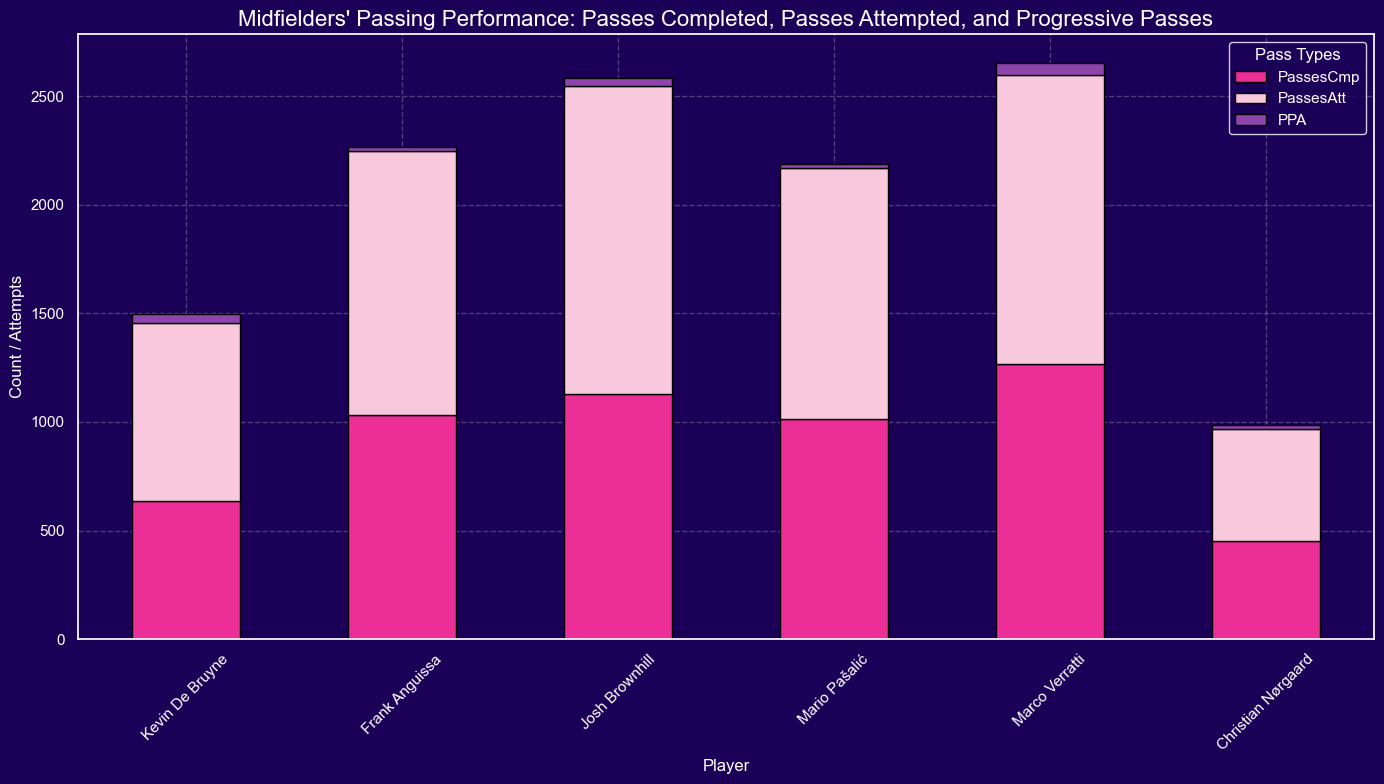

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Player': ['Kevin De Bruyne', 'Frank Anguissa', 'Josh Brownhill', 'Mario Pašalić', 'Marco Verratti', 'Christian Nørgaard'],
    'PassesCmp': [634, 1031, 1131, 1015, 1265, 452],
    'PassesAtt': [820, 1219, 1418, 1155, 1333, 516],
    'PPA': [44, 17, 36, 19, 55, 19],
}

dt1 = pd.DataFrame(data)

bg_color = "#1B0058"
text_color = "white"
bar_colors = ["#ec2e97", "#f8c8dc", "#8e44ad"]  

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

ax = dt1.set_index('Player')[['PassesCmp', 'PassesAtt', 'PPA']].plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=bar_colors,
    edgecolor="black"
)

ax.set_facecolor(bg_color)
plt.gcf().patch.set_facecolor(bg_color)
plt.title("Midfielders' Passing Performance: Passes Completed, Passes Attempted, and Progressive Passes", fontsize=16, color=text_color)
plt.ylabel('Count / Attempts', fontsize=12, color=text_color)
plt.xlabel('Player', fontsize=12, color=text_color)

ax.tick_params(axis='x', colors=text_color, rotation=45)
ax.tick_params(axis='y', colors=text_color)
for spine in ax.spines.values():
    spine.set_color(text_color)

plt.grid(True, linestyle="--", alpha=0.3)

legend = plt.legend(title="Pass Types", facecolor=bg_color, edgecolor="white", labelcolor=text_color)
plt.setp(legend.get_texts(), color=text_color)
plt.setp(legend.get_title(), color=text_color)

plt.tight_layout()
plt.show()

Analyzing Midfielders: Age, Progressive Passing, and Market Value

C:\Users\muspo\AppData\Local\Temp\ipykernel_1796\3231671020.py:13: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  bubble = sns.scatterplot(


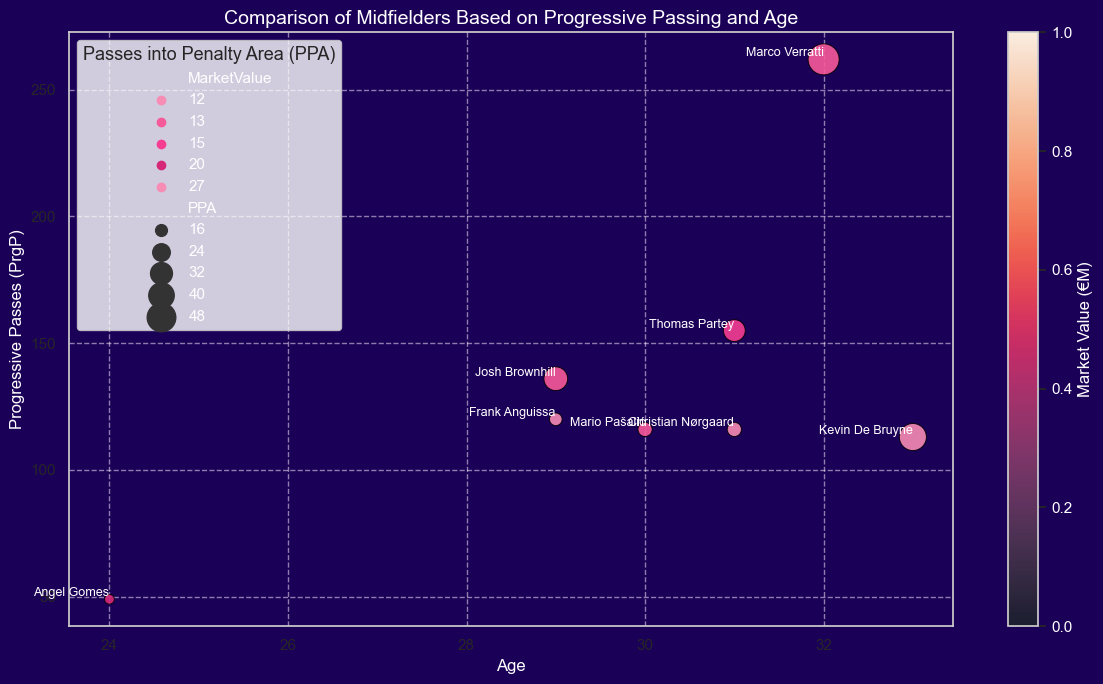

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

df_midfielders = df[df["Pos"].str.contains("MF", na=False)]

custom_pinks = ["#F78CB5", "#F75A99", "#F53E91", "#D62878"]  
cmap = sns.color_palette(custom_pinks, as_cmap=True)

bg_color = "#1B0058"  
text_color = "white"

plt.figure(figsize=(12, 7))
bubble = sns.scatterplot(
    data=df_midfielders,
    x="Age",
    y="PrgP",
    size="PPA",
    hue="MarketValue",
    sizes=(50, 500),
    palette=cmap,
    edgecolor="black",
    alpha=0.9
)

for i, row in df_midfielders.iterrows():
    plt.annotate(row["Player"], (row["Age"], row["PrgP"]), fontsize=9, ha='right', va='bottom', color=text_color)

plt.title("Comparison of Midfielders Based on Progressive Passing and Age", fontsize=14, color=text_color)
plt.xlabel("Age", color=text_color)
plt.ylabel("Progressive Passes (PrgP)", color=text_color)

cbar = plt.colorbar(bubble.collections[0], label="Market Value (€M)")
cbar.set_label('Market Value (€M)', color=text_color)
cbar.ax.tick_params(labelcolor=text_color)

plt.grid(True, linestyle="--", alpha=0.5, color=text_color)
plt.legend(title="Passes into Penalty Area (PPA)", loc='upper left', title_fontsize='13', fontsize='11', labelcolor=text_color)

plt.tight_layout()

plt.gcf().set_facecolor(bg_color)  
plt.gca().set_facecolor(bg_color)  

plt.show()

Defenders (DF) Analysis Based on Defensive Stats

<Figure size 1400x700 with 0 Axes>

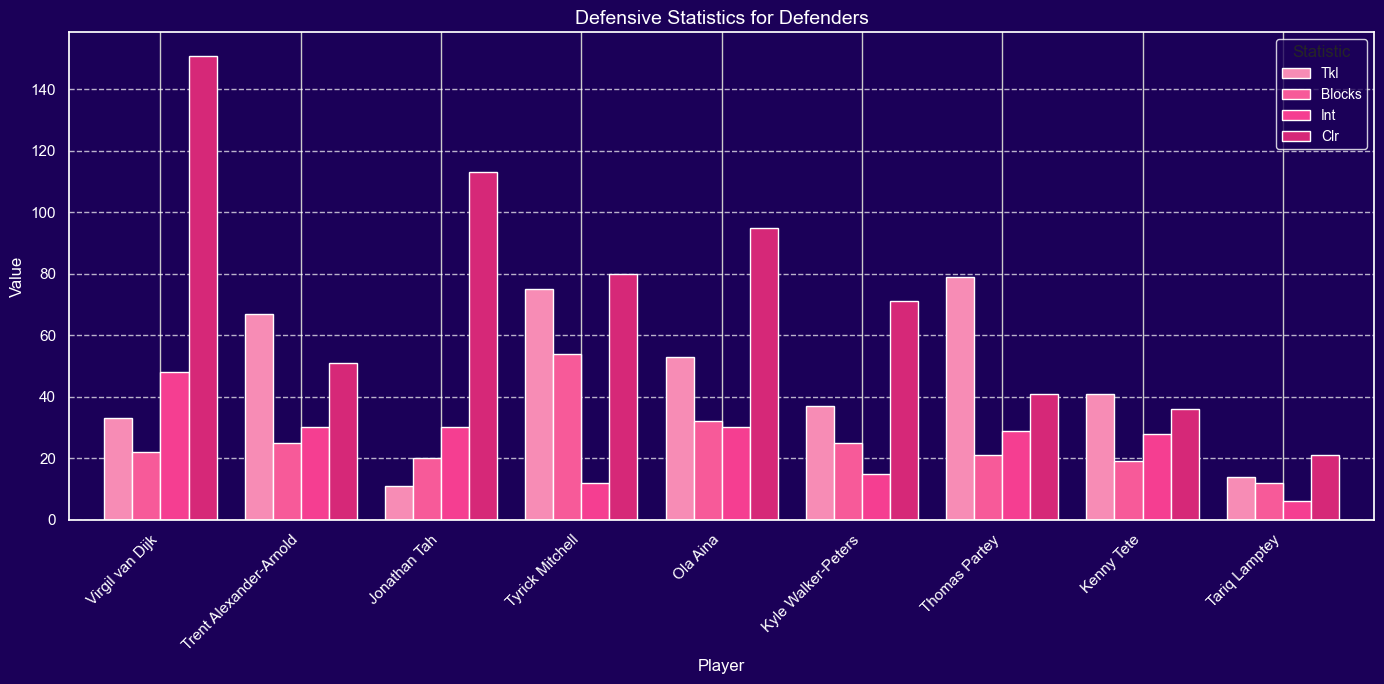

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

df_defenders = df[df["Pos"].str.contains("DF", na=False)]

defensive_stats = ["Tkl", "Blocks", "Int", "Clr"]

custom_pinks = ["#F78CB5", "#F75A99", "#F53E91", "#D62878"]

cmap = ListedColormap(custom_pinks[:len(defensive_stats)])

bg_color = "#1B0058"  
text_color = "white"

plt.figure(figsize=(14, 7))

df_defenders.set_index("Player")[defensive_stats].plot(kind="bar", figsize=(14, 7), colormap=cmap, width=0.8)

plt.gca().set_facecolor(bg_color)  
plt.gcf().patch.set_facecolor(bg_color)  

plt.title("Defensive Statistics for Defenders", fontsize=14, color=text_color)
plt.xlabel("Player", fontsize=12, color=text_color)
plt.ylabel("Value", fontsize=12, color=text_color)
plt.xticks(rotation=45, ha="right", color=text_color)
plt.yticks(color=text_color)

plt.legend(title="Statistic", title_fontsize=12, fontsize=10, labelcolor=text_color, facecolor=bg_color, edgecolor="white")
plt.grid(axis="y", linestyle="--", alpha=0.7, color=text_color)

for spine in plt.gca().spines.values():
    spine.set_color(text_color)

plt.tight_layout()
plt.show()